### 1. Realizar kmeans de iris cluster
#### 2. Un árbol de decisión para los clientes

In [1]:
import pandas as pd

In [2]:
rutaArchivo = "C:/Users/Jsant/Mall_Customers-2.csv"

In [3]:
import seaborn as sns

In [4]:
from sklearn.cluster import KMeans

In [5]:
#Cargar el DataSet
data = sns.load_dataset('iris')
data.head(6)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.rename({'petal_length':'Longitud_de_petalo', 'petal_width':'Ancho_de_petalo', 'sepal_length':'Longitud_de_sepalo', 'sepal_width':'Ancho_de_sepalo'}, axis=1, inplace=True)

In [8]:
data.head()

,Longitud_de_sepalo,Ancho_de_sepalo,Longitud_de_petalo,Ancho_de_petalo,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Longitud_de_sepalo,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Ancho_de_sepalo,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Longitud_de_petalo,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Ancho_de_petalo,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


In [10]:
data.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

### Segmentacion total 

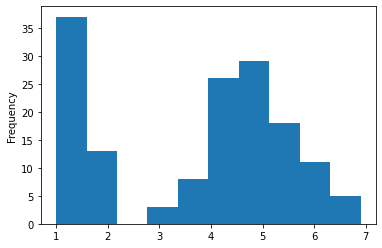

In [11]:
data.Longitud_de_petalo.plot.hist();

In [12]:
import matplotlib.pyplot as plt, seaborn as sns
sns.set()

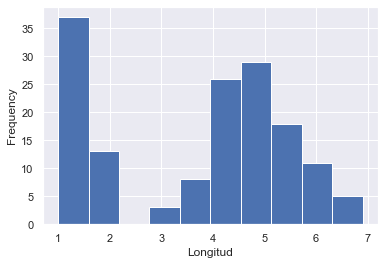

In [13]:
data.Longitud_de_petalo.plot.hist();
plt.xlabel('Longitud');

In [14]:
import numpy as np

In [15]:
#df['Especies']=np.where(data.Longitud >= 5, 'Longitud Alto',
 #                   np.where(data.Longitud < 4, 'Longitud bajo', "Longitud moderado")  )

In [16]:
data

,Longitud_de_sepalo,Ancho_de_sepalo,Longitud_de_petalo,Ancho_de_petalo,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [17]:
data.groupby('species')['Longitud_de_petalo'].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
setosa,50.0,1.462,0.173664,1.0,1.4,1.50,1.575,1.9
versicolor,50.0,4.260,0.469911,3.0,4.0,4.35,4.600,5.1
virginica,50.0,5.552,0.551895,4.5,5.1,5.55,5.875,6.9


### Estandarizacion de datos

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
col_a_escalar = ['Longitud_de_petalo', 'Ancho_de_petalo', 'Longitud_de_sepalo', 'Ancho_de_sepalo']

In [21]:
datos_a_escalar = data.copy()

In [22]:
datos_a_escalar[col_a_escalar]=scaler.fit_transform(data[col_a_escalar])

In [23]:
data.head(10)

,Longitud_de_sepalo,Ancho_de_sepalo,Longitud_de_petalo,Ancho_de_petalo,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [24]:
datos_a_escalar.head(10)

,Longitud_de_sepalo,Ancho_de_sepalo,Longitud_de_petalo,Ancho_de_petalo,species
0,-0.900681,1.019004,-1.340227,-1.315444,setosa
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa
2,-1.385353,0.328414,-1.397064,-1.315444,setosa
3,-1.506521,0.098217,-1.283389,-1.315444,setosa
4,-1.021849,1.249201,-1.340227,-1.315444,setosa
5,-0.537178,1.939791,-1.169714,-1.052180,setosa
6,-1.506521,0.788808,-1.340227,-1.183812,setosa
7,-1.021849,0.788808,-1.283389,-1.315444,setosa
8,-1.748856,-0.362176,-1.340227,-1.315444,setosa
9,-1.143017,0.098217,-1.283389,-1.447076,setosa


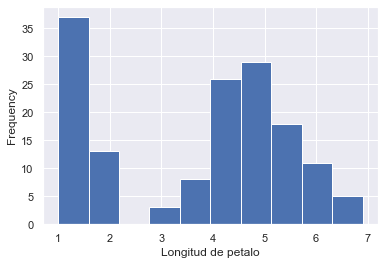

In [25]:
data.Longitud_de_petalo.plot.hist()
plt.xlabel('Longitud de petalo');

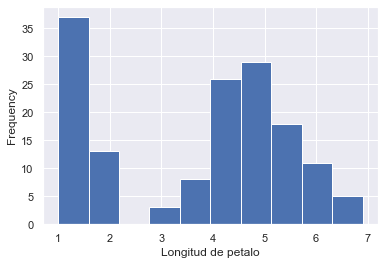

In [26]:
data.Longitud_de_petalo.plot.hist()
plt.xlabel('Longitud de petalo');

In [27]:
cluster_cols =['Longitud_de_petalo', 'Ancho_de_petalo', 'Longitud_de_sepalo']
datos_a_escalar[cluster_cols].head()

,Longitud_de_petalo,Ancho_de_petalo,Longitud_de_sepalo
0,-1.340227,-1.315444,-0.900681
1,-1.340227,-1.315444,-1.143017
2,-1.397064,-1.315444,-1.385353
3,-1.283389,-1.315444,-1.506521
4,-1.340227,-1.315444,-1.021849


# Uso de KMeans

In [28]:
from sklearn.cluster import KMeans

In [29]:
modelo = KMeans(n_clusters=3, random_state=42)


In [31]:
modelo.fit(datos_a_escalar[cluster_cols])

KMeans(n_clusters=3, random_state=42)

In [32]:
clusters_cols=['Longitud_de_petalo', 'Ancho_de_petalo', 'Longitud_de_sepalo']
datos_a_escalar[clusters_cols].head()

,Longitud_de_petalo,Ancho_de_petalo,Longitud_de_sepalo
0,-1.340227,-1.315444,-0.900681
1,-1.340227,-1.315444,-1.143017
2,-1.397064,-1.315444,-1.385353
3,-1.283389,-1.315444,-1.506521
4,-1.340227,-1.315444,-1.021849


In [33]:
modelo2 = KMeans(n_clusters=3, random_state=42)
modelo2.fit(datos_a_escalar[clusters_cols])

KMeans(n_clusters=3, random_state=42)

In [34]:
datos_a_escalar['Cluster3']=modelo2.predict(datos_a_escalar[clusters_cols])

In [35]:
datos_a_escalar

,Longitud_de_sepalo,Ancho_de_sepalo,Longitud_de_petalo,Ancho_de_petalo,species,Cluster3
0,-0.900681,1.019004,-1.340227,-1.315444,setosa,1
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa,1
2,-1.385353,0.328414,-1.397064,-1.315444,setosa,1
3,-1.506521,0.098217,-1.283389,-1.315444,setosa,1
4,-1.021849,1.249201,-1.340227,-1.315444,setosa,1
...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica,0
146,0.553333,-1.282963,0.705921,0.922303,virginica,0
147,0.795669,-0.131979,0.819596,1.053935,virginica,0
148,0.432165,0.788808,0.933271,1.448832,virginica,0


In [36]:
from sklearn import decomposition

In [37]:
pca=decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(datos_a_escalar[clusters_cols])

In [38]:
pca_res

array([[-2.06036006e+00, -2.98674403e-01],
       [-2.19598120e+00, -1.01727066e-01],
       [-2.36522102e+00,  8.07491332e-02],
       [-2.36579421e+00,  2.08165079e-01],
       [-2.12817063e+00, -2.00200734e-01],
       [-1.60325585e+00, -4.12703496e-01],
       [-2.32300467e+00,  2.62683189e-01],
       [-2.09455194e+00, -1.85729596e-01],
       [-2.53503403e+00,  3.90641278e-01],
       [-2.23877073e+00, -1.56245176e-01],
       [-1.82330967e+00, -5.79624270e-01],
       [-2.19655439e+00,  2.56888802e-02],
       [-2.34019999e+00, -7.22426457e-02],
       [-2.78010889e+00,  3.76712282e-01],
       [-1.65292347e+00, -1.01693236e+00],
       [-1.46706152e+00, -7.37066779e-01],
       [-1.73773060e+00, -4.70588050e-01],
       [-1.98395184e+00, -2.29685154e-01],
       [-1.47623237e+00, -7.77113751e-01],
       [-1.95033315e+00, -2.15214016e-01],
       [-1.75607230e+00, -5.50681993e-01],
       [-1.87392492e+00, -1.46224767e-01],
       [-2.53388765e+00,  1.35809386e-01],
       [-1.

In [39]:
datos_a_escalar['pc1']=pca_res[:,0]
datos_a_escalar['pc2']=pca_res[:,1]

In [40]:
datos_a_escalar

,Longitud_de_sepalo,Ancho_de_sepalo,Longitud_de_petalo,Ancho_de_petalo,species,Cluster3,pc1,pc2
0,-0.900681,1.019004,-1.340227,-1.315444,setosa,1,-2.060360,-0.298674
1,-1.143017,-0.131979,-1.340227,-1.315444,setosa,1,-2.195981,-0.101727
2,-1.385353,0.328414,-1.397064,-1.315444,setosa,1,-2.365221,0.080749
3,-1.506521,0.098217,-1.283389,-1.315444,setosa,1,-2.365794,0.208165
4,-1.021849,1.249201,-1.340227,-1.315444,setosa,1,-2.128171,-0.200201
...,...,...,...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,virginica,0,1.906692,0.124424
146,0.553333,-1.282963,0.705921,0.922303,virginica,0,1.262579,0.213420
147,0.795669,-0.131979,0.819596,1.053935,virginica,0,1.541846,0.114404
148,0.432165,0.788808,0.933271,1.448832,virginica,0,1.634876,0.645735


In [41]:
marcador = ['x','*', '.','|', '_']

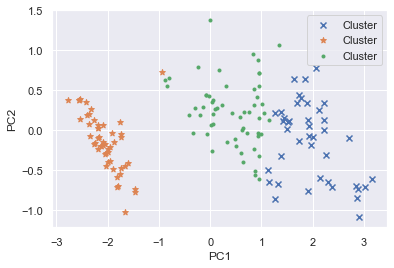

In [42]:
for segmento in range(3):
    temp=datos_a_escalar[datos_a_escalar.Cluster3==segmento]
    plt.scatter(temp.pc1, temp.pc2, marker=marcador[segmento], label='Cluster')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend();

In [43]:
data['Segmento IA']=datos_a_escalar.Cluster3

In [44]:
data

,Longitud_de_sepalo,Ancho_de_sepalo,Longitud_de_petalo,Ancho_de_petalo,species,Segmento IA
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,0
146,6.3,2.5,5.0,1.9,virginica,0
147,6.5,3.0,5.2,2.0,virginica,0
148,6.2,3.4,5.4,2.3,virginica,0


In [45]:
data.groupby('Segmento IA')[col_a_escalar].mean()

,Longitud_de_petalo,Ancho_de_petalo,Longitud_de_sepalo,Ancho_de_sepalo
Segmento IA,,,,
0,5.653659,2.036585,6.853659,3.068293
1,1.498039,0.260784,5.003922,3.407843
2,4.405172,1.432759,5.867241,2.741379


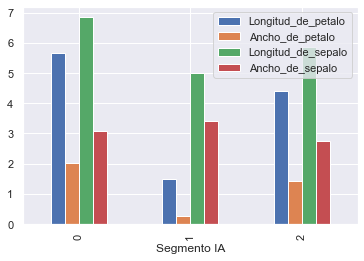

In [46]:
data.groupby('Segmento IA')[col_a_escalar].mean().plot.bar();

In [47]:
col_segmento = ['Longitud_de_petalo', 'Longitud_de_sepalo']

In [48]:
x=datos_a_escalar[col_segmento]

In [49]:
puntuacion_inercia =[]
for k in range(2,11):
    inercia=KMeans(n_clusters=k, random_state=42).fit(x).inertia_
    puntuacion_inercia.append(inercia)
puntuacion_inercia

[84.72073862193368,
 43.034691996034674,
 28.50821835607059,
 22.39598608015194,
 16.847199290462854,
 13.897240531466139,
 11.800764286157012,
 9.82991329020655,
 8.234724576099529]

In [50]:
cliente = data[['Longitud_de_petalo', 'Ancho_de_petalo', 'Longitud_de_sepalo']].copy()

In [51]:
#creamos el modelo 
km = KMeans(n_clusters=3, n_init=100, max_iter=1000, init='random')

In [52]:
prediccionkm=km.fit_predict(cliente)


In [53]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from mpl_toolkits import mplot3d

In [54]:
silhouette_score(cliente, prediccionkm)

0.5848326611166372

In [55]:
calinski_harabasz_score(cliente, prediccionkm)

684.292455197042

In [56]:
%matplotlib notebook

<IPython.core.display.Javascript object>


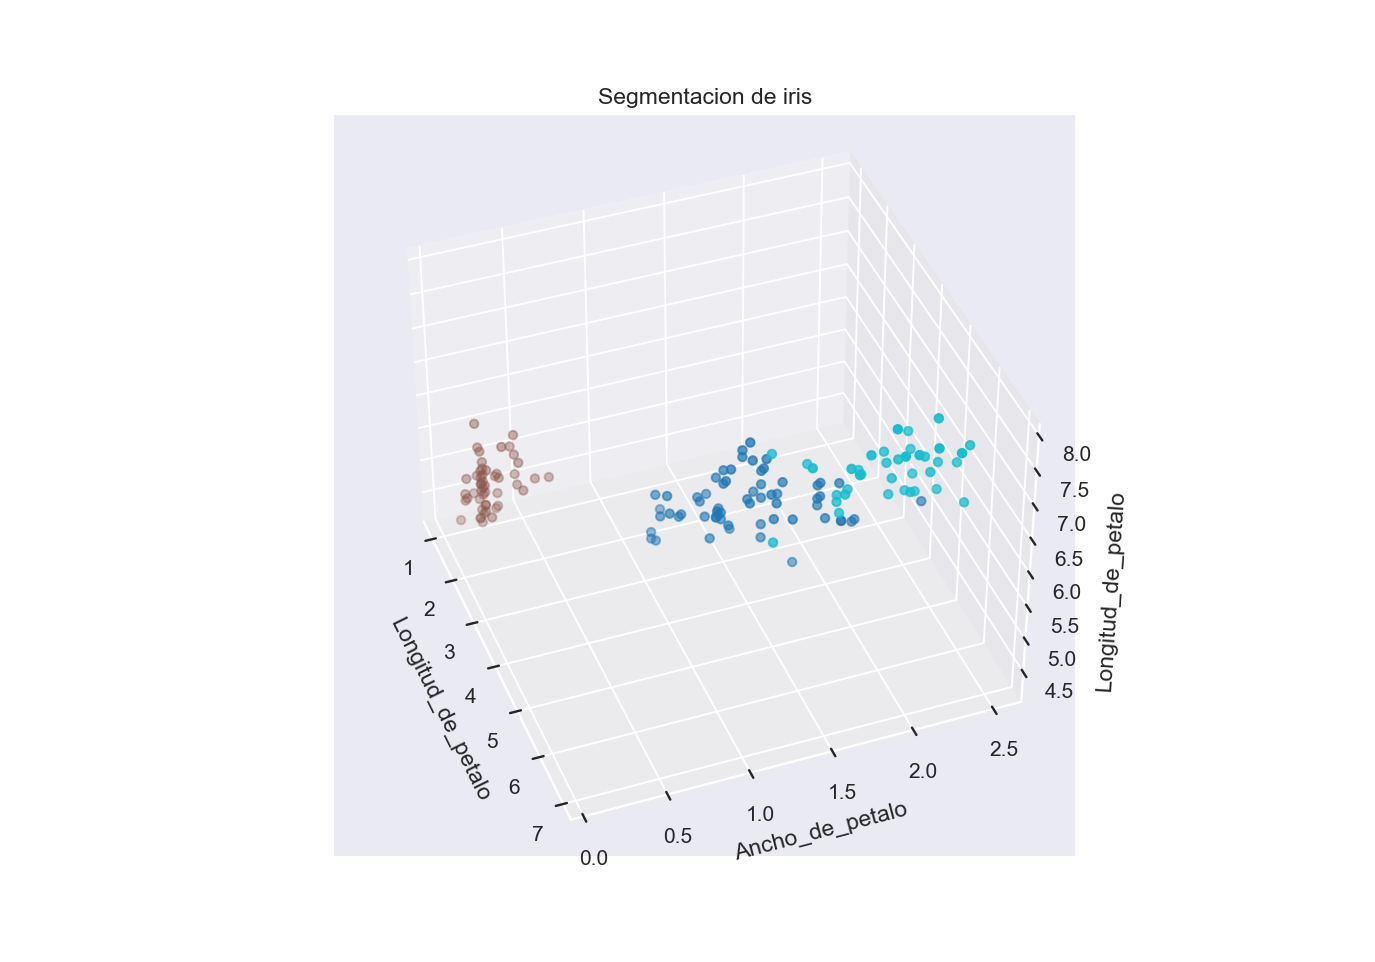

In [57]:
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')
ax.scatter3D(cliente['Longitud_de_petalo'], cliente['Ancho_de_petalo'], cliente['Longitud_de_sepalo'], c=prediccionkm, cmap='tab10')
plt.title('Segmentacion de iris')
ax.set_xlabel('Longitud_de_petalo')
ax.set_ylabel('Ancho_de_petalo')
ax.set_zlabel('Longitud_de_petalo')
plt.show();